# Exercici 1
## Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

## També adjunt trobaràs una descripció de les diferents variables del dataset.



### Información descriptiva:

Relevant Information:

   Concerns housing values in suburbs of Boston.

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars  
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000 dollars

Missing Attribute Values:  None.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv("C:/Users/alpid/Downloads/housing data.csv", header = None)
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Sanity check:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.duplicated().any()

False

In [5]:
df["CHAS"].unique()

array([0, 1], dtype=int64)

In [6]:
df["RAD"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

dado que me piden que divida el dataset en dos conjuntos no identificaré los inputs X y los outputs y:

In [7]:
train, test = train_test_split(df, random_state=1)
print(train.shape, test.shape)

(379, 14) (127, 14)


Hagamos un analisis descriptivo básico

In [8]:

df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,3.81,11.52,11.22,0.08,0.55,6.26,68.75,3.82,9.53,405.18,18.48,358.30,12.94,22.34
std,9.38,23.49,6.88,0.27,0.12,0.69,28.28,2.14,8.73,169.48,2.14,89.60,7.24,8.92
min,0.01,0.00,0.46,0.00,0.38,3.56,6.00,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.26,0.00,0.45,5.88,45.05,2.09,4.00,277.00,17.40,376.12,7.16,17.10
50%,0.25,0.00,9.69,0.00,0.54,6.17,79.20,3.32,5.00,329.00,19.10,392.04,11.97,20.80
75%,3.68,17.75,18.10,0.00,0.62,6.61,94.05,5.11,24.00,666.00,20.20,396.22,17.13,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [10]:
test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,3.04,10.89,10.89,0.03,0.56,6.37,68.05,3.71,9.62,417.35,18.39,351.81,11.81,23.09
std,5.69,22.89,6.84,0.18,0.11,0.74,27.87,2.01,8.66,166.01,2.24,96.37,6.78,9.99
min,0.01,0.00,1.25,0.00,0.39,4.14,2.90,1.18,1.00,193.00,13.00,3.65,1.92,6.30
25%,0.08,0.00,4.71,0.00,0.46,6.00,44.90,2.10,4.00,288.00,16.90,371.25,6.63,16.65
50%,0.29,0.00,8.56,0.00,0.54,6.31,73.30,2.89,5.00,370.00,18.90,389.96,10.40,22.00
75%,3.30,0.00,18.10,0.00,0.62,6.63,93.95,5.31,24.00,666.00,20.20,396.26,15.54,25.15
max,37.66,95.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,21.20,396.90,30.81,50.00


A pesar de haber hecho una selección aleatoria para cada conjunto, observamos diferencias entre la muestra completa y los dos conjuntos separados en medias, quartiles, valores máximos y mínimos.
Evidentemente los valores on mas cercanos entre el conjunto train y df que el conjunto test.

### Podría haber separado los valores de variables independientes y variable dependiente si me hubiera interesado.  
hagamos un ejemplo:

In [11]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print(X.shape, y.shape)

(506, 13) (506,)


Y habiendo elegido las variables de X e y, ya podría hacer el split, com he hecho antes, pero esta vez entre los valores de X e y, que serán para el Train y los que serán para el Test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


Como vemos, esta vez me crea cuatro conjuntos relacionados entre si en funcion si son de entrenamiento o de testeo.


# Exercici 2
## Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Tengo columnas con valores muy dispares. Necesito homogeniezar los datos, pero como puede haber outliers (datos atípicos) voy a  utilizar el método robust para estandarizarlos.

In [13]:
from sklearn import preprocessing

In [14]:
df_robust_scaler = preprocessing.RobustScaler().fit_transform(df)
df_robust_scaler

array([[-0.06959315,  1.44      , -0.57164988, ...,  0.26190191,
        -0.63768116,  0.35109718],
       [-0.06375455,  0.        , -0.20294345, ...,  0.26190191,
        -0.22188906,  0.05015674],
       [-0.06376011,  0.        , -0.20294345, ...,  0.06667466,
        -0.73263368,  1.69278997],
       ...,
       [-0.05445006,  0.        ,  0.17350891, ...,  0.26190191,
        -0.57171414,  0.33855799],
       [-0.04086745,  0.        ,  0.17350891, ...,  0.09641444,
        -0.48775612,  0.10031348],
       [-0.05816351,  0.        ,  0.17350891, ...,  0.26190191,
        -0.34782609, -1.1661442 ]])

In [15]:
df_r_scaled = pd.DataFrame(df_robust_scaler)  #no es necesario, pero lo convierto en Dataframe para comparar con df
df_r_scaled.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [16]:
df_r_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,9.337910e-01,0.909091,0.112067,0.069170,0.095400,0.103163,-0.181959,1.902672e-01,0.227470,0.202163,-0.212309,-1.667632,1.292417e-01,0.167123
std,2.392616e+00,1.865796,0.531398,0.253994,0.662158,0.952056,0.573881,6.818457e-01,0.435363,0.435496,0.773195,4.379176,7.137493e-01,1.153242
min,-6.959315e-02,0.000000,-0.714950,0.000000,-0.874286,-3.587398,-1.520897,-6.728244e-01,-0.200000,-0.369509,-2.303571,-18.761003,-9.625187e-01,-2.031348
25%,-4.852940e-02,0.000000,-0.348567,0.000000,-0.508571,-0.437669,-0.662080,-3.585445e-01,-0.050000,-0.131783,-0.589286,-0.770476,-4.407796e-01,-0.523511
50%,-7.697835e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.199102e-17,0.000000,0.000000,0.000000,0.000000,8.847090e-17,0.000000
75%,9.514706e-01,1.000000,0.651433,0.000000,0.491429,0.562331,0.337920,6.414555e-01,0.950000,0.868217,0.410714,0.229524,5.592204e-01,0.476489
max,2.467838e+01,8.000000,1.398141,1.000000,1.902857,3.484417,0.458716,2.888060e+00,0.950000,0.984496,1.053571,0.261902,2.659670e+00,3.611285


In [17]:
df_r_scaled["CHAS"].unique()

array([0., 1.])

In [18]:
df_r_scaled["RAD"].unique()

array([-0.2 , -0.15, -0.1 ,  0.  , -0.05,  0.15,  0.05,  0.1 ,  0.95])

### Siguiendo con el split de variables que he hecho antes X_train, y_train, X_test, y_test, voy a hacer una modelo de regresión:

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
model = RandomForestRegressor(random_state=1)   # Definimos elmodelo y lo entrenamos
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [21]:
y_pred = model.predict(X_test) # hacemos la predicción

In [22]:
mae = mean_absolute_error(y_test, y_pred)
print('El error medio absoluto de la prediccion MAE: %.3f' % mae)

El error medio absoluto de la prediccion MAE: 2.171


Veamos qué ocurre si uso los datos estandarizados:

In [23]:
X_s, y_s = df_r_scaled.iloc[:, :-1].values, df_r_scaled.iloc[:, -1].values  # Dividimos la muestra normalizada

In [24]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.33, random_state=1)  # Extremos las muestras de test y de train

In [25]:
model.fit(X_s_train, y_s_train)      # El model ya esta creado asi que lo entreno con el nuevo dataset.

RandomForestRegressor(random_state=1)

In [26]:
y_s_pred = model.predict(X_s_test)    # hago la predicción

In [27]:
mae_s = mean_absolute_error(y_s_test, y_s_pred)   # calculo el error
print('El error medio absoluto de la prediccion MAE_s: %.3f' % mae_s)

El error medio absoluto de la prediccion MAE_s: 0.275


Observamos cómo el error medio absoluto ha disminuido.

### Voy a crear una columna adicional para practicar con variables dummmy con la distancia a un centro de trabajo DIS, donde si la distancia es < 3.8 (media), entonces las opciones de encontrar trabajo (WFO) son "Cerca", y si > 3.8 son "Lejos".  
### Y despues crearé dos columnas una para cerca y otra para lejos:


In [28]:
df_d = df.copy()  # trabajaré sobre una copia para no mezclar con lo anterior 
df_d["WFO"] = np.where(df["DIS"]>3.8, "Lejos", "Cerca")
df_d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,WFO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Lejos
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Lejos
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Lejos
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,Lejos
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Lejos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,Cerca
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,Cerca
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,Cerca
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,Cerca


In [29]:
df_dummies = pd.get_dummies(df_d["WFO"])
df_dummies

,Cerca,Lejos
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


In [30]:
df_final = df.join(df_dummies)
df_final

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Cerca,Lejos
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1,0


# Exercici 3
## Resumeix les noves columnes generades de manera estadística i gràfica

No entinedo muy bien lo que se pide, pero voy a graficar los datos que me precen relevantes:

Veamos los histogramas del df, frente a los histogramas del mismo tras normalizarlos con Robust:

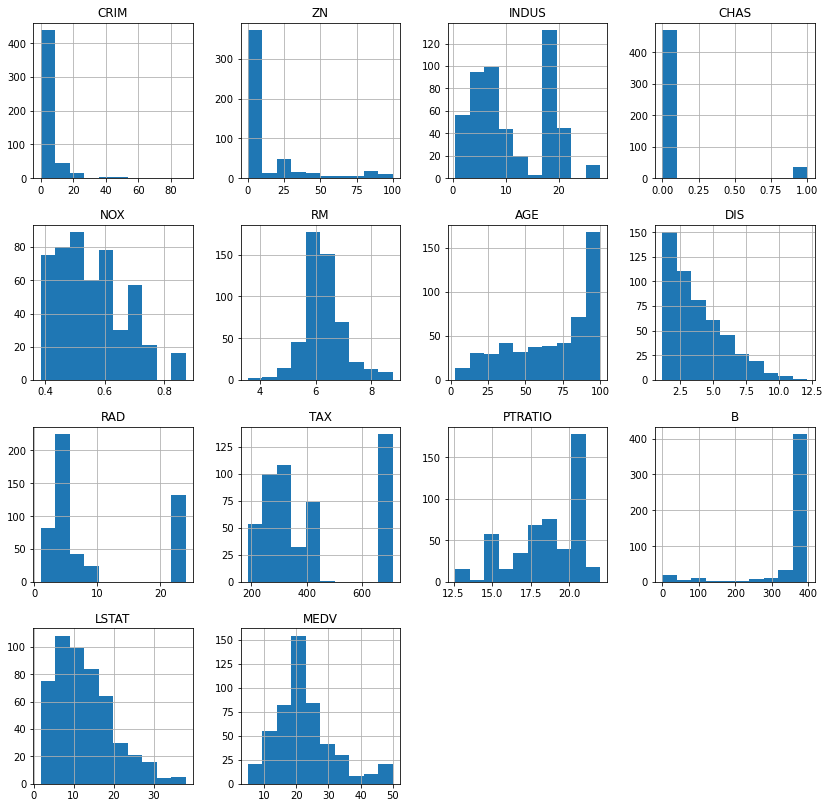

In [31]:
df.hist(figsize=(14, 14))
plt.show()

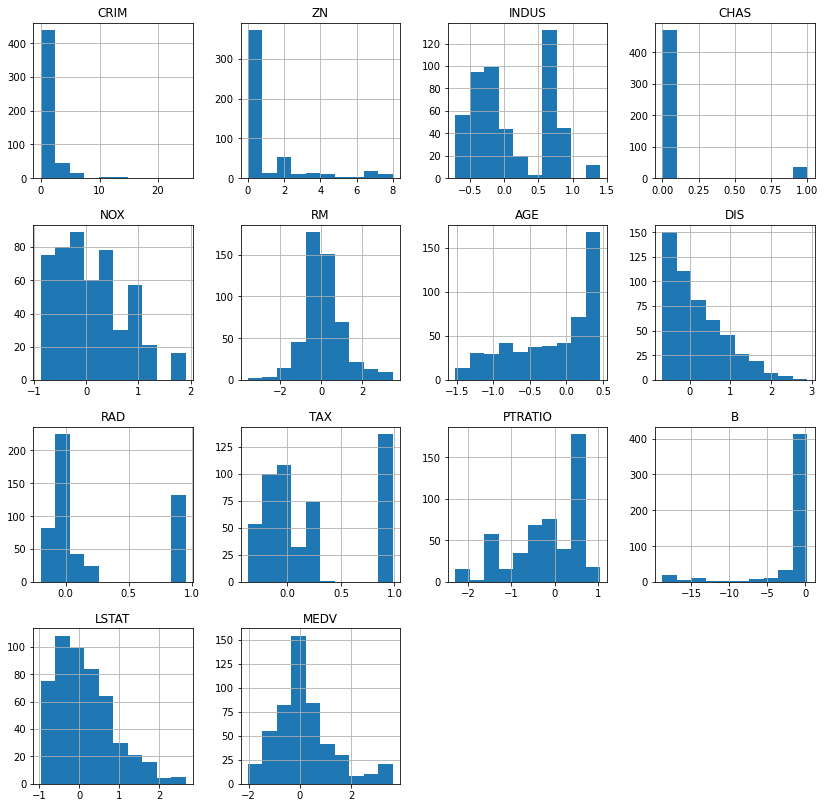

In [32]:
df_r_scaled.hist(figsize=(14, 14))
plt.show()

Como era de esperar, no se observan grandes variaciones entre uno y otro, teneindo un efcto de centrado con std = 1 y media =0.

Grafiaré también la realción entre la estimación y el resutlado esperado tras aplicar la regresión:

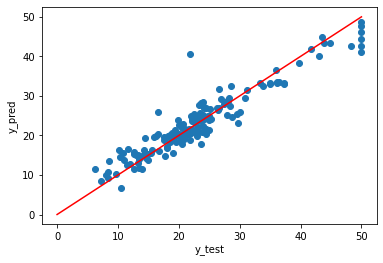

In [33]:
plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50], color="red")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Observamos que la función de regresión se aproxima al resultado esperado pero tiene algunos puntos con resultados alejados del esperado.

Veamos ahora cómo ha quedado la función de regresión tras la normalización:

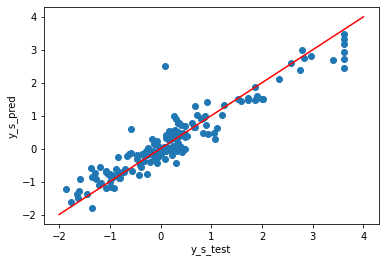

In [34]:
plt.scatter(y_s_test, y_s_pred)
plt.plot([-2,4],[-2,4], color="red")
plt.xlabel("y_s_test")
plt.ylabel("y_s_pred")
plt.show()

Observamos una distribución equivalente, pero con un error medio absoluto menor.